In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import datetime
import math

1) Log file is loaded

In [9]:
file = open("log.txt", "r") 
lines = file.readlines()
for l in range(3): print(lines[l][:-1])

156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356
176.247.135.49 [01/Jan/2018:11:18:07 +0100] "GET Shop.html HTTP/1.0" 200 7466
176.247.135.49 [01/Jan/2018:11:19:05 +0100] "GET AddProduct.html HTTP/1.0" 200 2356


2) Cass "Request" parses and keeps data of a single requests. Complete the TODO, where a given "line" (string) should be parsed in order to dervie the ip of the host making the request, time of the request (in seconds), and target page (name).

In [10]:
class Request:
    def __init__(self, line):
        spaceLine = line.split(' ')
        self.ip = spaceLine[0]
        timeIndex = spaceLine[1].find(':')
        time_string = spaceLine[1][timeIndex + 1:]
        workAround = time_string.split(':')
        finalTime = int(workAround[0]) * 3600 + int(workAround[1]) * 60 + int(workAround[2])
        self.time = finalTime
        self.page = spaceLine[4]

    def __repr__(self):
        return self.ip + "     " + str(datetime.timedelta(seconds=self.time)) + " -> " + self.page
        
Request('156.15.13.173 [01/Jan/2018:11:13:49 +0100] "GET AddProduct.html HTTP/1.0" 200 2356')

156.15.13.173     11:13:49 -> AddProduct.html

3) Each line of log.txt is parsed and the Request objects are added to the list

In [7]:
reqs = [Request(line) for line in lines]
for l in range(10): print(reqs[l]) 

156.15.13.173     11:13:49 -> AddProduct.html
176.247.135.49     11:18:07 -> Shop.html
176.247.135.49     11:19:05 -> AddProduct.html
176.247.135.49     11:29:05 -> Summary.html
69.84.30.199     11:43:59 -> Shop.html
69.84.30.199     11:45:16 -> AddProduct.html
57.116.45.120     11:46:45 -> AddProduct.html
69.84.30.199     11:50:36 -> Summary.html
69.84.30.199     11:52:38 -> Payment.html
26.19.183.202     11:53:11 -> AddProduct.html


# Exercise

Your task is to analyze the log file. You should indentify the users and sessions. Then, compute the following: <br>
3.1) the number of sessions (should be 1000 :) ), <br>
3.2) the number of users, <br>
3.3) the average number of sessions per one user <br>
3.4) use the distribution plot to visualize the sessions' lengths (minutes);  <br>
3.5) use the distribution plot to visualize the sessions' lengths (the number of requests) <br>
3.6) use the distribution plot to visualize sessions' starting times (hours). <br>
3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page,  <br>
3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page, <br>
3.9) for each page plot the average time the user stayed on this page <br>
3.10) print the fist 10 sessions (paths). <br>

You may find the following classes helpful and data.

In [13]:
class SolutionMaker:
    def __init__(self, compList, sessList):
        self.numberOfUsers = len(compList)
        self.numberOfSessions = len(sessList)
        self.averageNumberOfSessions = self.numberOfSessions / self.numberOfUsers

    def visualizeSessionMinutes(self):
        fig, axs = plt.subplots(1, 1)
        lengths = []
        for i in sessList:
            lengths.append(round((i.startTime - i.stopTime) / 60))
        sortedLengths = [0] * math.ceil((theta / 60))
        for i in lengths:
            sortedLengths[i] += 1
        xax = math.ceil(theta / 60)
        z = [0] * xax
        axs.bar([i for i in range(0, xax)], sortedLengths)  # , color='lightblue', linewidth=3)
        plt.show()

        pass

    def visualizeSessionRequests(self):
        requestPerSess = {}
        for i in userList:
            for z in i.sessions:
                try:
                    requestPerSess[len(z.requests)] += 1
                except(KeyError):
                    requestPerSess[len(z.requests)] = 1

        print(requestPerSess)
        fig, axs = plt.subplots(1, 1)
        axs.bar(requestPerSess.keys(), requestPerSess.values())
        plt.show()

    def visualizeSessionStartingHours(self):
        startHours = {x: 0 for x in range(0, 24)}
        for i in userList:
            for c in i.sessions:
                secondToDate = (datetime.timedelta(seconds=c.startTime))
                startHours[secondToDate.seconds // 3600] += 1
        fig, axs = plt.subplots(1, 1)
        axs.bar(startHours.keys(), startHours.values())
        plt.show()

    def visualizeEntryPoints(self):
        entryPoints = {x: 0 for x in PAGES}
        for i in userList:
            for c in i.sessions:
                entryPoints[c.requests[0]] += 1
        print(entryPoints)
        fig, axs = plt.subplots(1, 1)
        axs.bar(entryPoints.keys(), entryPoints.values())
        plt.show()

    def visualizeDeparturePoints(self):
        departurePoints = {x: 0 for x in PAGES}
        for i in userList:
            for c in i.sessions:
                departurePoints[c.requests[len(c.requests) - 1]] += 1
        print(departurePoints)
        fig, axs = plt.subplots(1, 1)
        axs.bar(departurePoints.keys(), departurePoints.values())
        plt.show()

    def visualizeAverageTimeOnPage(self):
        averagePageTimes = {x: 0 for x in PAGES}
        for y in averagePageTimes:
            if pageTotalVisits[y] != 0:
                averagePageTimes[y] = pageTotalTime[y] / pageTotalVisits[y]

        fig, axs = plt.subplots(1, 1)
        axs.bar(averagePageTimes.keys(), averagePageTimes.values())
        plt.show()
        print(averagePageTimes)
        pass

    def printFirstSessions(self, n):
        '''
        :param n: The number of sessions to be printed
        '''
        for x in range(0, 10):
             print(userList[x].sessions[0].requests)

class Session:
    def __init__(self, **data):
        self.startTime = data.get('time', 0)
        self.stopTime = data.get('time', 0)
        self.requests = data.get('request', [])
        self.attainable = LINKS[pageToNumber[data.get('request', [5])[0]]]
    
    def updateStoptime(self, s):
        self.startTime = s

    def handleNewRequest(self, s, y):
        # print("atta: ",self.attainable,"    requested: ",pageToNumber[s.page],"\n")
        if s.time - self.stopTime < gamma and s.time - self.startTime < theta and pageToNumber[
            s.page] in self.attainable:
            pageTotalTime[self.requests[len(self.requests) - 1]] += s.time - self.stopTime
            self.stopTime = s.time
            pageTotalVisits[self.requests[len(self.requests) - 1]] += 1
            self.requests.append(s.page)
            self.attainable = LINKS[pageToNumber[s.page]]
        else:
            # print("A: ", self.stopTime, self.startTime, s.time, "\n")
            y.sessions.append(Session(time=x.time, request=[x.page]))

class User:
    def __init__(self, theIp):
        self.ip = theIp
        self.sessions = []

    def __repr__(self):
         return self.ip
        
def findComputer(x):
    for y in userList:
        if y.ip == x.ip:
            return y
    return None

PAGES = ["Shop.html", "AddProduct.html", "Summary.html", "Payment.html","About.html", "Contact.html"]

#to neatly convert page names to their indexes in array
pageToNumber = {x: i for i, x in enumerate(PAGES)}

# used only for average times on pages (contact and payment will be 0)
pageTotalTime = {i: 0 for i in PAGES}
pageTotalVisits = {i: 0 for i in PAGES}

LINKS = [[1, 4],
         [2,4],
         [3],
         [],
         [1,5],
         []]

# max time from the beggining of the session
theta = 2400
# max time between page swap
gamma = 1000



userList=[]

formatedRequest=[Request(x) for x in lines]


for x in formatedRequest:
    y = findComputer(x)
    # computer was not found so we definitely want to create new session
    if y is None:
        y = User(x.ip)
        userList.append(y)
        y.sessions.append(Session(time=x.time, request=[x.page]))
    # computer was found check if it has any session and if yes invoke handling the Request
    else:
        if len(y.sessions) == 0:
            y.sessions.append(Session(x.time, x.page))
        else:
            y.sessions[len(y.sessions) - 1].handleNewRequest(x, y)

sessList = []
for x in userList:
    sessList += x.sessions

solution = SolutionMaker(userList, sessList)

3.1) the number of sessions

In [15]:
solution.numberOfSessions

1000

3.2) the number of users

In [16]:
solution.numberOfUsers

391

3.3) the average number of sessions per one user

In [18]:
solution.averageNumberOfSessions

2.557544757033248

3.4) use the distribution plot to visualize the sessions' lengths (minutes)

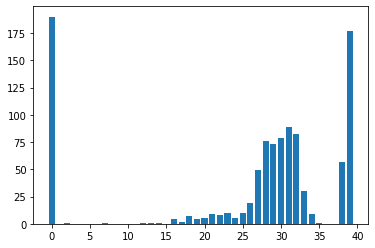

In [19]:
solution.visualizeSessionMinutes()

3.5) use the distribution plot to visualize the sessions' lengths (the number of requests)

{1: 190, 4: 182, 2: 276, 3: 338, 5: 10, 7: 1, 6: 3}


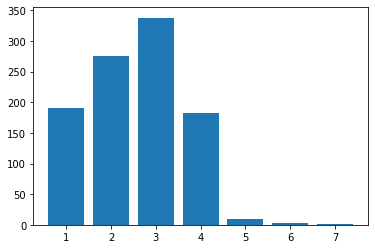

In [20]:
solution.visualizeSessionRequests()

3.6) use the distribution plot to visualize sessions' starting times (hours)

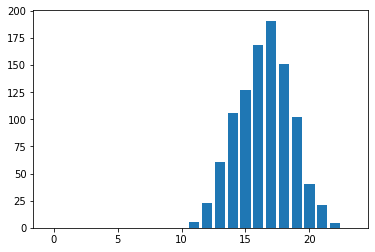

In [21]:
solution.visualizeSessionStartingHours()

3.7) which web page is the most common entry point?; for each page plot the number of times it has been an entry page

{'Shop.html': 690, 'AddProduct.html': 310, 'Summary.html': 0, 'Payment.html': 0, 'About.html': 0, 'Contact.html': 0}


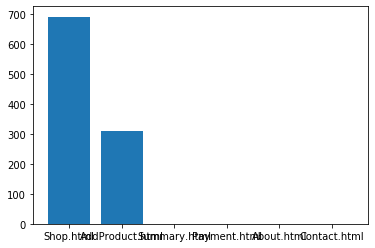

In [22]:
solution.visualizeEntryPoints()

3.8) which web page is the most common departure point?; for each page plot the number of times the user stopped a session while being on this page

{'Shop.html': 62, 'AddProduct.html': 302, 'Summary.html': 71, 'Payment.html': 268, 'About.html': 97, 'Contact.html': 200}


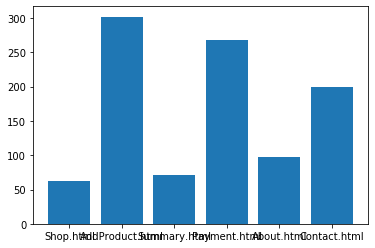

In [23]:
solution.visualizeDeparturePoints()

3.9) for each page plot the average time the user stayed on this page

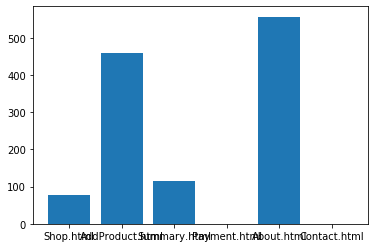

{'Shop.html': 76.57484076433121, 'AddProduct.html': 458.29245283018867, 'Summary.html': 116.06343283582089, 'Payment.html': 0, 'About.html': 557.0878661087866, 'Contact.html': 0}


In [24]:
solution.visualizeAverageTimeOnPage()

3.10) print the fist 10 sessions (paths).

In [25]:
solution.printFirstSessions(10)


['AddProduct.html']
['Shop.html', 'AddProduct.html', 'Summary.html']
['Shop.html', 'AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'Summary.html', 'Payment.html']
['AddProduct.html', 'About.html', 'Contact.html']
['Shop.html', 'AddProduct.html']
['Shop.html', 'About.html']
['Shop.html', 'About.html', 'Contact.html']
['Shop.html']
['AddProduct.html']
